## Create Area Monitoring with JSON

In [1]:
import json

def create_geojson_polygon(coordinates, output_file):
    feature_collection = {
        "type": "FeatureCollection",
        "features": [
            {
                "type": "Feature",
                "properties": {},
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [coordinates]
                }
            }
        ]
    }

    with open(output_file, 'w') as json_file:
        json.dump(feature_collection, json_file, indent=2)

def parse_coordinates(input_string):
    coordinates_list = []
    lines = input_string.strip().split(';')
    for line in lines:
        lat, lon = map(float, line.strip().split(','))
        coordinates_list.append([lon, lat])  # Reversed order to match GeoJSON format
    return coordinates_list


In [2]:
# Example coordinates
input_coordinates = """

-7.943937635117735, 112.71637199680825;
-7.9438860507692715, 112.7176898705625;
-7.944062959954348, 112.71776004400303;
-7.944012414480676, 112.71811729060941;
-7.944625277930157, 112.71835332857243;
-7.944177015471495, 112.72014987609394;
-7.946104020618114, 112.7207617340482;
-7.947399357598347, 112.71740713915074;
-7.943937635117735, 112.71637199680825

"""

# Save GeoJSON to .json file
output_file_path = 'output_6.json'
coordinates_list = parse_coordinates(input_coordinates)
create_geojson_polygon(coordinates_list, output_file_path)

print(f'GeoJSON data has been saved to {output_file_path}')

GeoJSON data has been saved to output_6.json


## Make NDVI from Hyperspectral Band

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


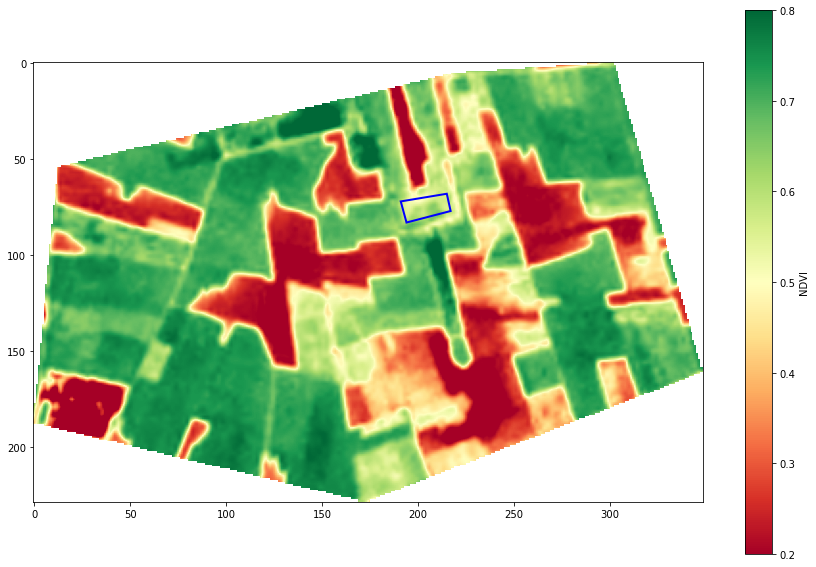

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Load the band 8 and band 4 images
band4 = plt.imread(r'data baru\tahun_2021\2021 (10)\2021-08-08-00_00_2021-08-08-23_59_Sentinel-2_L2A_B04_(Raw).tiff').astype(float)
band8 = plt.imread(r'data baru\tahun_2021\2021 (10)\2021-08-08-00_00_2021-08-08-23_59_Sentinel-2_L2A_B08_(Raw).tiff').astype(float)

# Calculate NDVI
ndvi = (band8 - band4) / (band8 + band4)

# Define the coordinates of the polygon (example coordinates)
polygon_coords = np.array([[226, 165], [235, 170], [244, 178], [248, 174], [244, 163], [238, 156], [224, 159]])
#polygon_coords = np.array([[105, 111], [122, 115], [114, 135], [84, 128], [93, 119], [100, 121]])
polygon_coords = np.array([[191, 72], [194, 83], [217, 77], [215, 68]])

# Create a figure and axes
plt.figure(figsize=(15, 10))
plt.imshow(ndvi, cmap='RdYlGn', vmin=0.2, vmax=0.8)
plt.colorbar(label='NDVI')

# Plot the polygon
polygon = Polygon(polygon_coords, edgecolor='blue', linewidth=2, fill=False)
plt.gca().add_patch(polygon)

# Display the plot
plt.axis('on')
plt.show()


C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


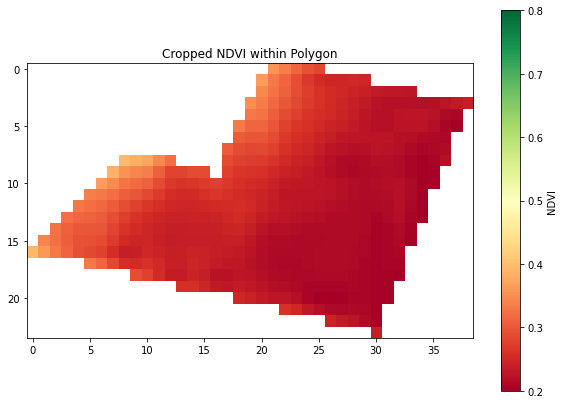

Average NDVI within the polygon: 0.2470429485701422


In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def crop_ndvi(ndvi, polygon_coords):
    # Create meshgrid of coordinates
    x_coords, y_coords = np.meshgrid(np.arange(ndvi.shape[1]), np.arange(ndvi.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T
    
    # Create polygon patch
    polygon = Polygon(polygon_coords, closed=True)
    
    # Check which points are within the polygon
    mask = polygon.contains_points(points)
    mask = mask.reshape(ndvi.shape)
    
    # Crop NDVI using the mask
    cropped_ndvi = np.where(mask, ndvi, np.nan)
    
    return cropped_ndvi, mask

# Load the band 8 and band 4 images
band4 = plt.imread(r'data baru\tahun_2021\2021 (10)\2021-08-08-00_00_2021-08-08-23_59_Sentinel-2_L2A_B04_(Raw).tiff').astype(float)
band8 = plt.imread(r'data baru\tahun_2021\2021 (10)\2021-08-08-00_00_2021-08-08-23_59_Sentinel-2_L2A_B08_(Raw).tiff').astype(float)

# Calculate NDVI
ndvi = (band8 - band4) / (band8 + band4)

# Define polygon coordinates
polygon_coords = np.array([[105, 111], [122, 115], [114, 135], [84, 128], [93, 119], [100, 121]])

# Crop the NDVI within the polygon
cropped_ndvi, mask = crop_ndvi(ndvi, polygon_coords)

# Extract the bounding box of the polygon
min_row = np.min(np.where(mask)[0])
max_row = np.max(np.where(mask)[0])
min_col = np.min(np.where(mask)[1])
max_col = np.max(np.where(mask)[1])

# Extract the region within the bounding box
cropped_ndvi_bounded = cropped_ndvi[min_row:max_row+1, min_col:max_col+1]

# Display the cropped NDVI within the bounding box
plt.figure(figsize=(10, 7))
plt.imshow(cropped_ndvi_bounded, cmap='RdYlGn', vmin=0.2, vmax=0.8)
plt.colorbar(label='NDVI')
plt.title('Cropped NDVI within Polygon')
plt.axis('on')
plt.show()

# Print the average NDVI value within the polygon
average_ndvi = np.nanmean(cropped_ndvi_bounded)
print("Average NDVI within the polygon:", average_ndvi)

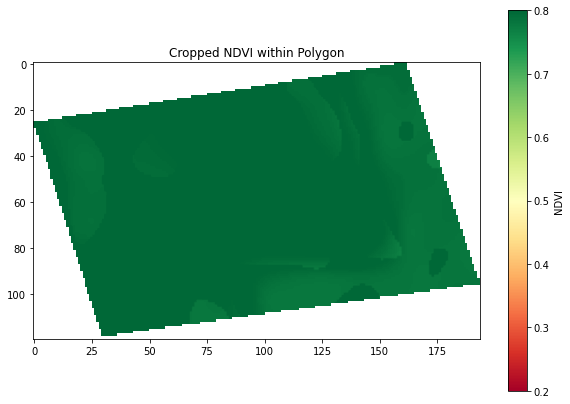

Average NDVI within the polygon: 0.8066485169779505


In [157]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def crop_ndvi(ndvi, polygon_coords):
    # Create meshgrid of coordinates
    x_coords, y_coords = np.meshgrid(np.arange(ndvi.shape[1]), np.arange(ndvi.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T
    
    # Create polygon patch
    polygon = Polygon(polygon_coords, closed=True)
    
    # Check which points are within the polygon
    mask = polygon.contains_points(points)
    mask = mask.reshape(ndvi.shape)
    
    # Crop NDVI using the mask
    cropped_ndvi = np.where(mask, ndvi, np.nan)
    
    return cropped_ndvi, mask

# Load the band 8 and band 4 images
band4 = plt.imread(r'data besar mei 2024\2021-07-29-00_00_2021-07-29-23_59_Sentinel-2_L2A_B04_(Raw).png').astype(float)
band8 = plt.imread(r'data besar mei 2024\2021-07-29-00_00_2021-07-29-23_59_Sentinel-2_L2A_B08_(Raw).png').astype(float)

# Calculate NDVI
ndvi = (band8 - band4) / (band8 + band4)

# Define polygon coordinates
polygon_coords = np.array([[795, 244], [825, 338], [990, 315], [958, 218]])

# Crop the NDVI within the polygon
cropped_ndvi, mask = crop_ndvi(ndvi, polygon_coords)

# Extract the bounding box of the polygon
min_row = np.min(np.where(mask)[0])
max_row = np.max(np.where(mask)[0])
min_col = np.min(np.where(mask)[1])
max_col = np.max(np.where(mask)[1])

# Extract the region within the bounding box
cropped_ndvi_bounded = cropped_ndvi[min_row:max_row+1, min_col:max_col+1]

# Display the cropped NDVI within the bounding box
plt.figure(figsize=(10, 7))
plt.imshow(cropped_ndvi_bounded, cmap='RdYlGn', vmin=0.2, vmax=0.8)
plt.colorbar(label='NDVI')
plt.title('Cropped NDVI within Polygon')
plt.axis('on')
plt.show()

# Print the average NDVI value within the polygon
average_ndvi = np.nanmean(cropped_ndvi_bounded)
print("Average NDVI within the polygon:", average_ndvi)

## Version 1 : All Date and Specific Area

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


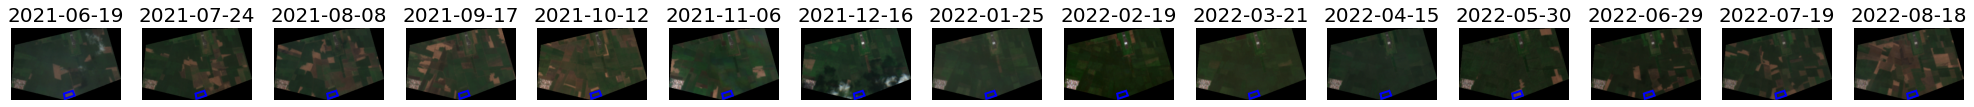

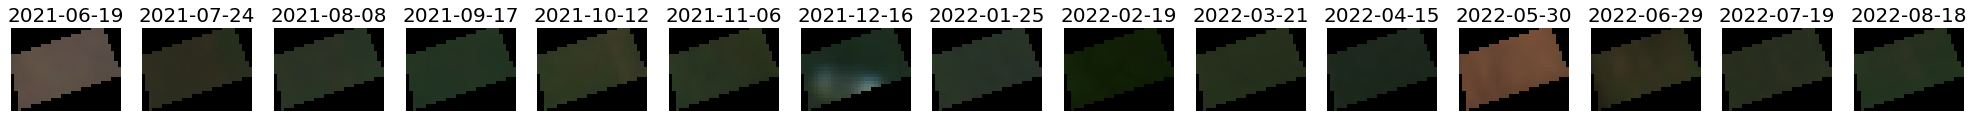

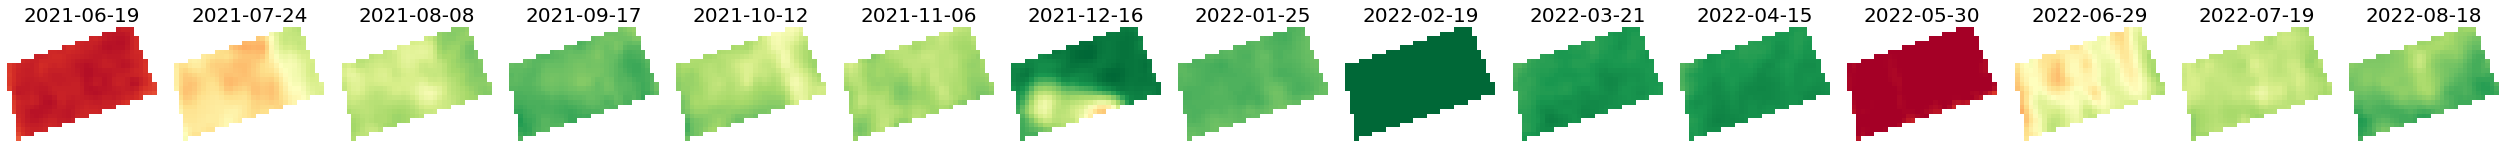

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import glob
import os
from PIL import Image

def crop_ndvi(ndvi, polygon_coords):
    x_coords, y_coords = np.meshgrid(np.arange(ndvi.shape[1]), np.arange(ndvi.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T
    
    polygon = Polygon(polygon_coords, closed=True)
    
    mask = polygon.contains_points(points)
    mask = mask.reshape(ndvi.shape)
    cropped_ndvi = np.where(mask, ndvi, np.nan)
    
    return cropped_ndvi, mask

def crop_true_color(true_color, polygon_coords):
    x_coords, y_coords = np.meshgrid(np.arange(true_color.shape[1]), np.arange(true_color.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T

    polygon = Polygon(polygon_coords, closed=True)
    
    mask = polygon.contains_points(points)
    mask = mask.reshape(true_color.shape[0], true_color.shape[1], -1)
    cropped_true_color = np.where(mask, true_color, 0)
    
    return cropped_true_color

# Directory data master
base_dir = r"data baru\siklus 2021-2022"

# Menentukan file band 4, band 8, and true color image di dalam direktori
band4_files = glob.glob(os.path.join(base_dir, '**/*_L2A_B04_(Raw).tiff'), recursive=True)
band8_files = glob.glob(os.path.join(base_dir, '**/*_L2A_B08_(Raw).tiff'), recursive=True)
true_color_files = glob.glob(os.path.join(base_dir, '**/*_L2A_True_color.tiff'), recursive=True)

# Penting : Sort seluruh file sesuai tanggal
band4_files.sort()
band8_files.sort()
true_color_files.sort()

# Memastikan file band 4, band 8, dan true color sudah sesuai pasangannya
assert len(band4_files) == len(band8_files) == len(true_color_files), "The number of band 4, band 8, and true color files do not match."

# Ekstrak informasi tanggal di masing-masing file
def extract_date(filename):
    return filename.split('-00')[0]

sorted_files = sorted(zip(band4_files, band8_files, true_color_files), key=lambda x: extract_date(os.path.basename(x[0])))

# Define polygon coordinates
#Siklus 1 = 06/2021 - 05/2022
polygon_coords = np.array([[169, 209], [172, 225], [203, 215], [197, 200]])
#polygon_coords = np.array([[315, 58], [293, 60], [295, 66], [319, 67]])

#Siklus 1 = 06/2021 - 06/2022
#polygon_coords = np.array([[135, 137], [138, 154], [158, 163], [152, 137]])
#Siklus 2 = 

fig1, axes1 = plt.subplots(nrows=1, ncols=len(band4_files), figsize=(35, 8))
fig2, axes2 = plt.subplots(nrows=1, ncols=len(band4_files), figsize=(35, 8))
fig3, axes3 = plt.subplots(nrows=1, ncols=len(band4_files), figsize=(35, 8))

for i, (band4_path, band8_path, true_color_path) in enumerate(sorted_files):
    base_name_4 = os.path.basename(band4_path).replace('_L2A_B04_(Raw).tiff', '')
    base_name_8 = os.path.basename(band8_path).replace('_L2A_B08_(Raw).tiff', '')
    base_name_tc = os.path.basename(true_color_path).replace('_L2A_True_color.tiff', '')
    assert base_name_4 == base_name_8 == base_name_tc, "File pairs do not match"

    date_str = extract_date(base_name_4)

    band4 = plt.imread(band4_path).astype(float)
    band8 = plt.imread(band8_path).astype(float)
    true_color = np.array(Image.open(true_color_path))

    ndvi = (band8 - band4) / (band8 + band4)
    
    cropped_ndvi, mask = crop_ndvi(ndvi, polygon_coords)
    cropped_true_color = crop_true_color(true_color, polygon_coords)
    
    if not np.any(mask):
        print(f"No points found within polygon for image {date_str}. Skipping.")
        continue

    min_row = np.min(np.where(mask)[0])
    max_row = np.max(np.where(mask)[0])
    min_col = np.min(np.where(mask)[1])
    max_col = np.max(np.where(mask)[1])
    
    cropped_ndvi_bounded = cropped_ndvi[min_row:max_row+1, min_col:max_col+1]
    cropped_true_color = cropped_true_color[min_row:max_row+1, min_col:max_col+1]
    
    ax1 = axes1[i]
    ax1.imshow(true_color)
    
    polygon_patch = Polygon(polygon_coords, closed=True, edgecolor='b', fill=False, linewidth=2)
    ax1.add_patch(polygon_patch)
    ax1.set_title(f'{date_str}', fontsize=20)
    ax1.axis('off')
    
    ax2 = axes2[i]
    ax2.imshow(cropped_true_color)
    ax2.set_title(f'{date_str}', fontsize=20)
    ax2.axis('off')
    
    ax3 = axes3[i]
    ax3.imshow(cropped_ndvi_bounded, cmap='RdYlGn', vmin=0.2, vmax=0.8)
    ax3.set_title(f'{date_str}', fontsize=20)
    ax3.axis('off')
    
plt.tight_layout()
plt.show()


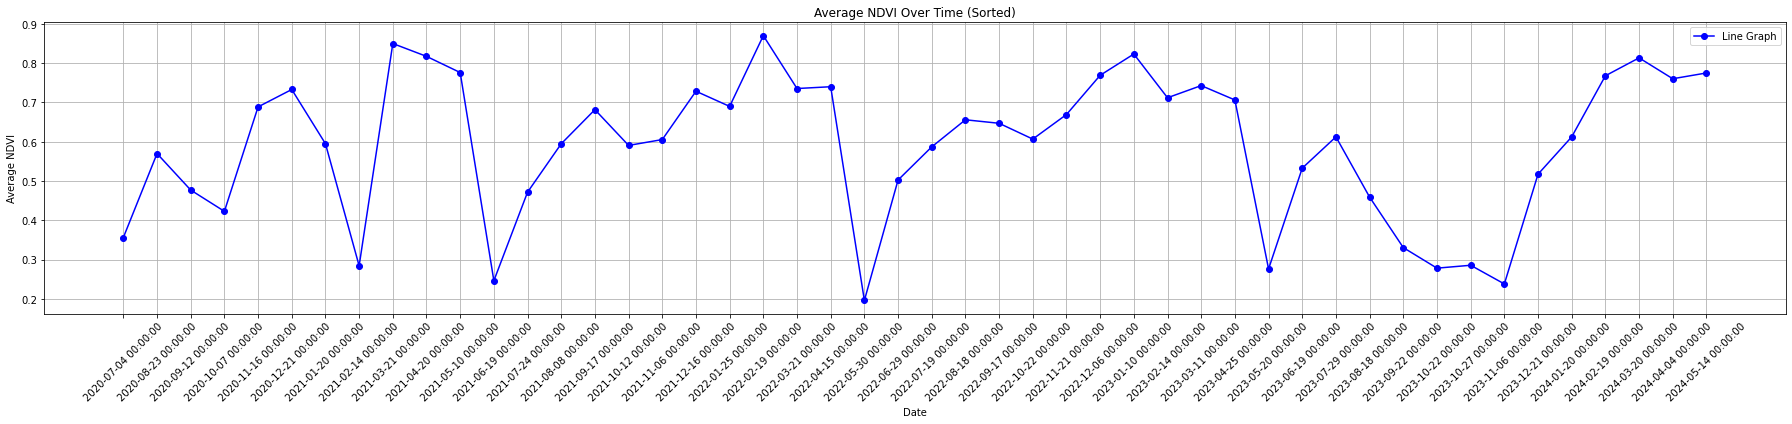

In [54]:
from datetime import datetime

dates = []
average_ndvis = []

for band4_path, band8_path in zip(band4_files, band8_files):
    band4 = plt.imread(band4_path).astype(float)
    band8 = plt.imread(band8_path).astype(float)

    ndvi = (band8 - band4) / (band8 + band4)

    # Crop citra NDVI sesuai polygon
    cropped_ndvi, mask = crop_ndvi(ndvi, polygon_coords)

    # Extract the bounding box of the polygon
    min_row = np.min(np.where(mask)[0])
    max_row = np.max(np.where(mask)[0])
    min_col = np.min(np.where(mask)[1])
    max_col = np.max(np.where(mask)[1])

    cropped_ndvi_bounded = cropped_ndvi[min_row:max_row+1, min_col:max_col+1]
    average_ndvi = np.nanmean(cropped_ndvi_bounded)
    #print(f"Average NDVI within the polygon for {os.path.basename(band4_path)}:", average_ndvi)

    date_str = os.path.basename(band4_path).split('-00')[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')  
    dates.append(date)

    average_ndvis.append(average_ndvi)

sorted_indices = np.argsort(dates)
sorted_dates = [dates[i] for i in sorted_indices]
sorted_ndvis = [average_ndvis[i] for i in sorted_indices]

sorted_dates = [dates[i] for i in sorted_indices]
sorted_ndvis = [average_ndvis[i] for i in sorted_indices]

plt.figure(figsize=(25, 6))
plt.plot(sorted_ndvis, marker='o', color='blue', label='Line Graph')
plt.xlabel('Date')
plt.ylabel('Average NDVI')
plt.title('Average NDVI Over Time (Sorted)')

plt.xticks(range(len(sorted_dates)), [sorted_dates[i] for i in range(len(sorted_dates))])
plt.xticks(rotation=45)
plt.tight_layout()

plt.grid(True)
plt.legend()
plt.show()

## Version 2 : Specific Date and Area

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:127: RuntimeWarning: invalid value encountered in true_divide


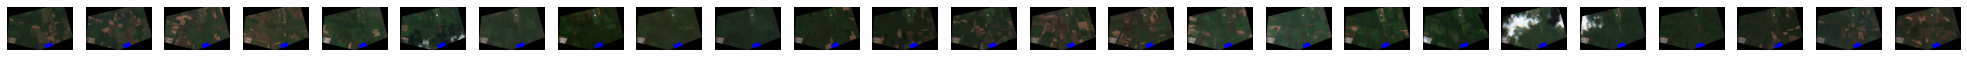

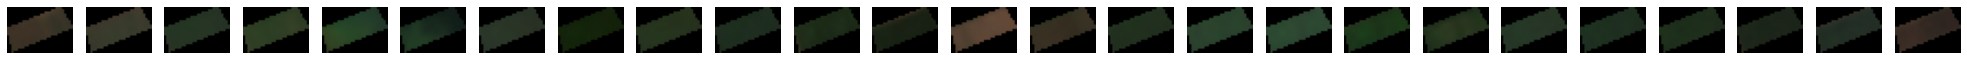

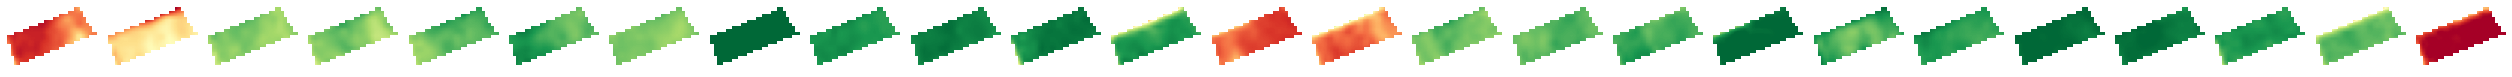

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import glob
import os
from PIL import Image
from datetime import datetime

def crop_ndvi(ndvi, polygon_coords):
    x_coords, y_coords = np.meshgrid(np.arange(ndvi.shape[1]), np.arange(ndvi.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T
    
    polygon = Polygon(polygon_coords, closed=True)
    
    mask = polygon.contains_points(points)
    mask = mask.reshape(ndvi.shape)
    
    cropped_ndvi = np.where(mask, ndvi, np.nan)
    
    return cropped_ndvi, mask

def crop_true_color(true_color, polygon_coords):
    x_coords, y_coords = np.meshgrid(np.arange(true_color.shape[1]), np.arange(true_color.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T
    
    polygon = Polygon(polygon_coords, closed=True)
    
    mask = polygon.contains_points(points)
    mask = mask.reshape(true_color.shape[0], true_color.shape[1], -1)
    
    cropped_true_color = np.where(mask, true_color, 0)
    
    return cropped_true_color

# Directory data master
base_dir = r"data baru/master 2020 - 2024"

# Menentukan file band 4, band 8, and true color image di dalam direktori
band4_files = glob.glob(os.path.join(base_dir, '**/*_L2A_B04_(Raw).tiff'), recursive=True)
band8_files = glob.glob(os.path.join(base_dir, '**/*_L2A_B08_(Raw).tiff'), recursive=True)
true_color_files = glob.glob(os.path.join(base_dir, '**/*_L2A_True_color.tiff'), recursive=True)

# Penting : Sort seluruh file sesuai tanggal
band4_files.sort()
band8_files.sort()
true_color_files.sort()

# Memastikan file band 4, band 8, dan true color sudah sesuai pasangannya
assert len(band4_files) == len(band8_files) == len(true_color_files), "Warning! File band 4, band 8, and true color tidak sesuai."

# Ekstrak informasi tanggal di masing-masing file
def extract_date(filename):
    date_str = filename.split('-00')[0]
    return datetime.strptime(date_str, '%Y-%m-%d')

# Menentukan rentang tanggal yang ingin dianalisis
start_date_str = "2021-07-01"  
end_date_str = "2023-07-30"

start_date = datetime.strptime(start_date_str, '%Y-%m-%d')
end_date = datetime.strptime(end_date_str, '%Y-%m-%d')

# Define polygon coordinates
#juni21 u11
polygon_coords = np.array([[167, 205], [174, 226], [205, 213], [195, 194]])
polygon_coords = np.array([[257, 3], [288, 2], [293, 14], [263, 19]])


#polygon_coords = np.array([[315, 57], [296, 60], [298, 63], [318, 63]]) #catatan belum
#juni21 u12
polygon_coords = np.array([[137, 154], [159, 163], [155, 136], [136, 127]])
polygon_coords = np.array([[290, 71], [293, 80], [319, 75], [318, 71]])
polygon_coords = np.array([[181, 130], [210, 128], [213, 135], [185, 137]])
#juni21 u13
polygon_coords = np.array([[132, 113], [153, 120], [155, 137], [134, 130]])

#juli21 u10
polygon_coords = np.array([[296, 155], [301, 176], [315, 172], [307, 154]])
polygon_coords = np.array([[245, 134], [249, 151], [267, 148], [265, 134]])
#juli21 u11
#polygon_coords = np.array([[185, 141], [203, 139], [215, 172], [196, 175]])
#polygon_coords = np.array([[200, 192], [221, 185], [225, 195], [205, 203]])
#polygon_coords = np.array([[232, 204], [249, 197], [246, 188], [241, 196], [237, 192], [230, 194]])
#juli21 u12
#polygon_coords = np.array([[169, 166], [186, 162], [192, 178], [175, 184]])
polygon_coords = np.array([[203, 204], [206, 215], [234, 204], [228, 194]])

#juli21 u13
#polygon_coords = np.array([[158, 150], [181, 141], [188, 158], [163, 166]])
#polygon_coords = np.array([[220, 124], [235, 177], [246, 183], [256, 179], [241, 129]])

#Polygon Rumput
#polygon_coords = np.array([[180, 34], [187, 58], [193, 58], [188, 32]])
#polygon_coords = np.array([[206, 33], [207, 46], [213, 45], [212, 32]])
#polygon_coords = np.array([[191, 71], [193, 80], [203, 80], [201, 70]])
#polygon_coords = np.array([[205, 69], [207, 77], [219, 76], [216, 68]])

# Filter, ambil data sesuai rentang tanggal yang sudah disetting
filtered_files = [
    (b4, b8, tc) for b4, b8, tc in zip(band4_files, band8_files, true_color_files)
    if start_date <= extract_date(os.path.basename(b4)) <= end_date
]

# # Penting : Sort seluruh file sesuai tanggal
filtered_files.sort(key=lambda x: extract_date(os.path.basename(x[0])))

fig1, axes1 = plt.subplots(nrows=1, ncols=len(filtered_files), figsize=(35, 8))
fig2, axes2 = plt.subplots(nrows=1, ncols=len(filtered_files), figsize=(35, 8))
fig3, axes3 = plt.subplots(nrows=1, ncols=len(filtered_files), figsize=(35, 8))

for i, (band4_path, band8_path, true_color_path) in enumerate(filtered_files):
    base_name_4 = os.path.basename(band4_path).replace('_L2A_B04_(Raw).tiff', '')
    base_name_8 = os.path.basename(band8_path).replace('_L2A_B08_(Raw).tiff', '')
    base_name_tc = os.path.basename(true_color_path).replace('_L2A_True_color.tiff', '')
    assert base_name_4 == base_name_8 == base_name_tc, "File pairs do not match"

    date_str = extract_date(base_name_4).strftime('%Y-%m-%d')

    band4 = plt.imread(band4_path).astype(float)
    band8 = plt.imread(band8_path).astype(float)
    true_color = np.array(Image.open(true_color_path))

    ndvi = (band8 - band4) / (band8 + band4)

    cropped_ndvi, mask = crop_ndvi(ndvi, polygon_coords)
    cropped_true_color = crop_true_color(true_color, polygon_coords)

    if not np.any(mask):
        print(f"No points found within polygon for image {date_str}. Skipping.")
        continue

    min_row = np.min(np.where(mask)[0])
    max_row = np.max(np.where(mask)[0])
    min_col = np.min(np.where(mask)[1])
    max_col = np.max(np.where(mask)[1])

    cropped_ndvi_bounded = cropped_ndvi[min_row:max_row+1, min_col:max_col+1]
    cropped_true_color = cropped_true_color[min_row:max_row+1, min_col:max_col+1]

    ax1 = axes1[i]
    ax1.imshow(true_color)
    polygon_patch = Polygon(polygon_coords, closed=True, edgecolor='b', fill=False, linewidth=2)
    ax1.add_patch(polygon_patch)
    #ax1.set_title(f'{date_str}', fontsize=20)
    ax1.axis('off')

    ax2 = axes2[i]
    ax2.imshow(cropped_true_color)
    #ax2.set_title(f'{date_str}', fontsize=20)
    ax2.axis('off')

    ax3 = axes3[i]
    ax3.imshow(cropped_ndvi_bounded, cmap='RdYlGn', vmin=0.2, vmax=0.8)
    #ax3.set_title(f'{date_str}', fontsize=20)
    ax3.axis('off')

plt.tight_layout()
plt.show()

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in true_divide


(203,204) (206,215) (234,204) (228,194);0.29781041583823237;0.4299474567715718;0.642402985196631;0.6485458159372957;0.6819112239926369;0.7112531474519673;0.6531624100101885;0.8562547848025354;0.7426631361235895;0.7697492682430157;0.7650959486496662;0.7085681408484297;0.29717905249744847;0.3427825395698196;0.668796260488265;0.6883894776371544;0.711062079465509;0.7996148190664308;0.7059106957047653;0.7304428907693877;0.7949612518187638;0.7834166719275572;0.7350020923571805;0.6666296675198168;0.21652081239581672


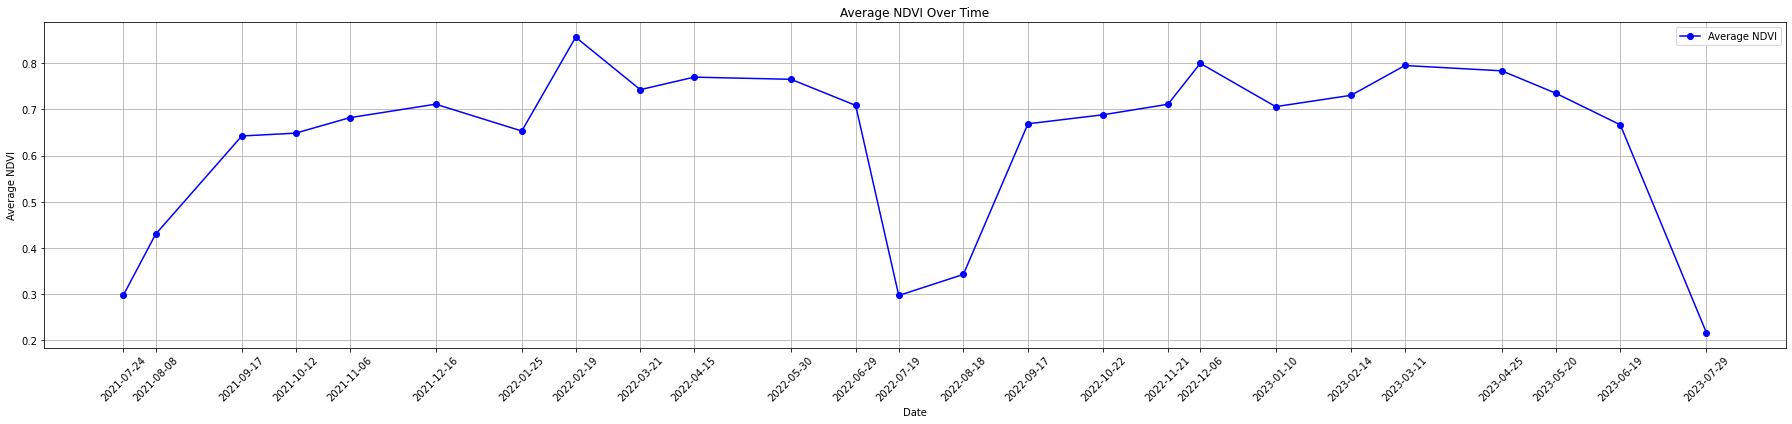

In [8]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Polygon

# Function to crop NDVI based on polygon coordinates
def crop_ndvi(ndvi, polygon_coords):
    x_coords, y_coords = np.meshgrid(np.arange(ndvi.shape[1]), np.arange(ndvi.shape[0]))
    x_coords_flat = x_coords.flatten()
    y_coords_flat = y_coords.flatten()
    points = np.vstack((x_coords_flat, y_coords_flat)).T
    
    polygon = Polygon(polygon_coords, closed=True)
    
    mask = polygon.contains_points(points)
    mask = mask.reshape(ndvi.shape)
    
    cropped_ndvi = np.where(mask, ndvi, np.nan)
    
    return cropped_ndvi, mask

# Filter, ambil data sesuai rentang tanggal yang sudah disetting
filtered_files = [
    (b4, b8, tc) for b4, b8, tc in zip(band4_files, band8_files, true_color_files)
    if start_date <= extract_date(os.path.basename(b4)) <= end_date
]

dates = []
average_ndvis = []

# Calculate average NDVI for each date within the date range
for band4_path, band8_path, _ in filtered_files:
    band4 = plt.imread(band4_path).astype(float)
    band8 = plt.imread(band8_path).astype(float)

    ndvi = (band8 - band4) / (band8 + band4)

    # Crop citra NDVI sesuai polygon
    cropped_ndvi, mask = crop_ndvi(ndvi, polygon_coords)

    # Extract the bounding box of the polygon
    min_row = np.min(np.where(mask)[0])
    max_row = np.max(np.where(mask)[0])
    min_col = np.min(np.where(mask)[1])
    max_col = np.max(np.where(mask)[1])

    cropped_ndvi_bounded = cropped_ndvi[min_row:max_row+1, min_col:max_col+1]
    average_ndvi = np.nanmean(cropped_ndvi_bounded)

    date_str = os.path.basename(band4_path).split('-00')[0]
    date = datetime.strptime(date_str, '%Y-%m-%d')  
    dates.append(date)
    average_ndvis.append(average_ndvi)

# Sort dates and corresponding NDVI values
sorted_indices = np.argsort(dates)
sorted_dates = [dates[i] for i in sorted_indices]
sorted_ndvis = [average_ndvis[i] for i in sorted_indices]

# Print output in the requested format
polygon_str = ' '.join([f'({x},{y})' for x, y in polygon_coords])
ndvi_values_str = ';'.join([str(ndvi) for ndvi in sorted_ndvis])
output_str = f'{polygon_str};{ndvi_values_str}'
print(output_str)

# Plot average NDVI over time
plt.figure(figsize=(25, 6))
plt.plot(sorted_dates, sorted_ndvis, marker='o', color='blue', label='Average NDVI')
plt.xlabel('Date')
plt.ylabel('Average NDVI')
plt.title('Average NDVI Over Time')
plt.xticks(sorted_dates, [date.strftime('%Y-%m-%d') for date in sorted_dates], rotation=45)
plt.tight_layout()
plt.grid(True)
plt.legend()
plt.show()

## NDVI Mapping untuk seluruh citra

C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


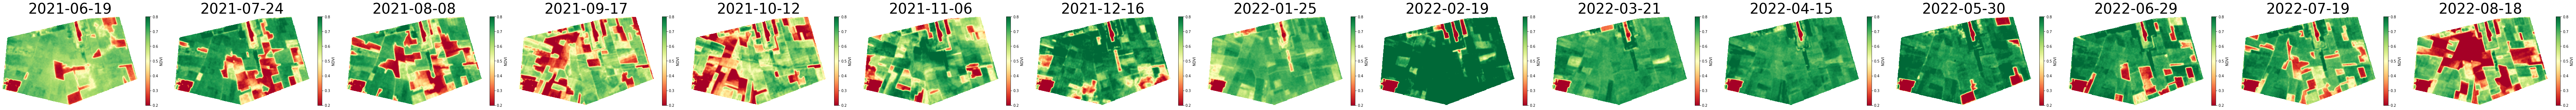

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image

# Directory containing the subfolders with image files
base_dir = r"data baru\siklus 2021-2022"

# Find all band 4, band 8, and true color image files within the subfolders
band4_files = glob.glob(os.path.join(base_dir, '**/*_L2A_B04_(Raw).tiff'), recursive=True)
band8_files = glob.glob(os.path.join(base_dir, '**/*_L2A_B08_(Raw).tiff'), recursive=True)
true_color_files = glob.glob(os.path.join(base_dir, '**/*_L2A_True_color.tiff'), recursive=True)

# Ensure the lists are sorted to match corresponding pairs
band4_files.sort()
band8_files.sort()
true_color_files.sort()

# Ensure the number of band 4, band 8, and true color files match
assert len(band4_files) == len(band8_files) == len(true_color_files), "The number of band 4, band 8, and true color files do not match."

# Extract dates from filenames and sort the files based on these dates
def extract_date(filename):
    return filename.split('-00')[0]

sorted_files = sorted(zip(band4_files, band8_files, true_color_files), key=lambda x: extract_date(os.path.basename(x[0])))

# Load the band 4 and band 8 images, calculate NDVI, and store the images in a list
ndvi_images = []
dates = []

for band4_path, band8_path, true_color_path in sorted_files:
    try:
        # Extract filenames to ensure they are matching pairs
        base_name_4 = os.path.basename(band4_path).replace('_L2A_B04_(Raw).tiff', '')
        base_name_8 = os.path.basename(band8_path).replace('_L2A_B08_(Raw).tiff', '')
        base_name_tc = os.path.basename(true_color_path).replace('_L2A_True_color.tiff', '')
        assert base_name_4 == base_name_8 == base_name_tc, "File pairs do not match"

        # Extract the date from the filename
        date_str = extract_date(base_name_4)
        dates.append(date_str)

        # Load the band 4 and band 8 images
        band4 = plt.imread(band4_path).astype(float)
        band8 = plt.imread(band8_path).astype(float)

        # Calculate NDVI
        ndvi = (band8 - band4) / (band8 + band4)
        ndvi_images.append(ndvi)
    except Exception as e:
        print(f"Error processing files {band4_path}, {band8_path}, {true_color_path}: {e}")

# Set up the figure for the subplots
plt.figure(figsize=(100, 4))

# Loop through each NDVI image and display it in a subplot
for i, ndvi_image in enumerate(ndvi_images):
    ax = plt.subplot(1, len(ndvi_images), i + 1)
    im = ax.imshow(ndvi_image, cmap='RdYlGn', vmin=0.2, vmax=0.8)  # Adjusted vmin and vmax for NDVI range
    plt.colorbar(im, ax=ax, label='NDVI')
    ax.set_title(f'{dates[i]}', fontsize=40)
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


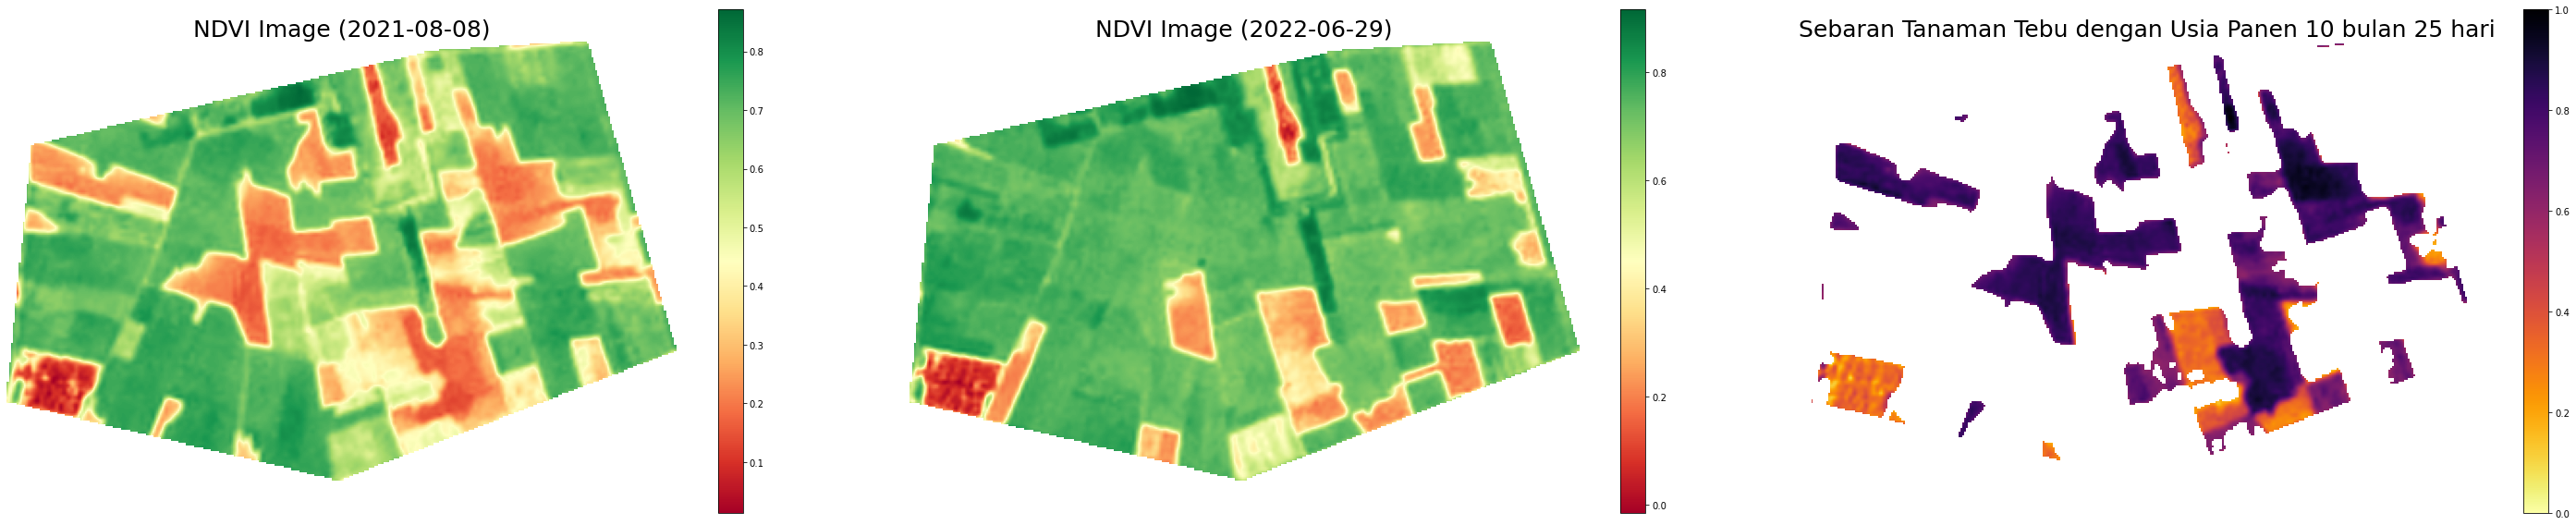

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from PIL import Image
from datetime import datetime

# Directory containing the subfolders with image files
base_dir = r"data baru\siklus 2021-2022"

# Variables to define the start and end month
bulan_1 = 3
bulan_2 = 13

# Find all band 4, band 8, and true color image files within the subfolders
band4_files = glob.glob(os.path.join(base_dir, '**/*_L2A_B04_(Raw).tiff'), recursive=True)
band8_files = glob.glob(os.path.join(base_dir, '**/*_L2A_B08_(Raw).tiff'), recursive=True)
true_color_files = glob.glob(os.path.join(base_dir, '**/*_L2A_True_color.tiff'), recursive=True)

# Ensure the lists are sorted to match corresponding pairs
band4_files.sort()
band8_files.sort()
true_color_files.sort()

# Ensure the number of band 4, band 8, and true color files match
assert len(band4_files) == len(band8_files) == len(true_color_files), "The number of band 4, band 8, and true color files do not match."

# Extract dates from filenames and sort the files based on these dates
def extract_date(filename):
    return filename.split('-00')[0]

sorted_files = sorted(zip(band4_files, band8_files, true_color_files), key=lambda x: extract_date(os.path.basename(x[0])))

# Load the band 4 and band 8 images, calculate NDVI, and store the images in a list
ndvi_images = []
dates = []

for band4_path, band8_path, true_color_path in sorted_files:
    try:
        base_name_4 = os.path.basename(band4_path).replace('_L2A_B04_(Raw).tiff', '')
        base_name_8 = os.path.basename(band8_path).replace('_L2A_B08_(Raw).tiff', '')
        base_name_tc = os.path.basename(true_color_path).replace('_L2A_True_color.tiff', '')
        assert base_name_4 == base_name_8 == base_name_tc, "File pairs do not match"

        date_str = extract_date(base_name_4)
        dates.append(date_str)

        band4 = plt.imread(band4_path).astype(float)
        band8 = plt.imread(band8_path).astype(float)

        np.seterr(divide='ignore', invalid='ignore')

        ndvi = (band8 - band4) / (band8 + band4)
        # ndvi = np.where(np.isnan(ndvi), 0, ndvi)  # Replace NaN values with 0
        # ndvi = np.where(np.isinf(ndvi), 0, ndvi)  # Replace infinite values with 0

        ndvi_images.append(ndvi)
    except Exception as e:
        print(f"Error processing files {band4_path}, {band8_path}, {true_color_path}: {e}")

# Ensure there are enough NDVI images for the specified months
assert len(ndvi_images) >= bulan_2, "There are not enough NDVI images to perform the operation."

# Get NDVI images at index bulan_1-1 and bulan_2-1
ndvi_1 = ndvi_images[bulan_1-1]
ndvi_12 = ndvi_images[bulan_2-1]

# Get the corresponding dates for the plots
date_1 = dates[bulan_1-1]
date_12 = dates[bulan_2-1]

# Calculate the difference in days between date_12 and date_1
date_format = "%Y-%m-%d"  # Format of the date in the filename
date_1_obj = datetime.strptime(date_1, date_format)
date_12_obj = datetime.strptime(date_12, date_format)
days_difference = (date_12_obj - date_1_obj).days

# Calculate months and days from days_difference
months = days_difference // 30
days = days_difference % 30

# Remove NDVI values greater than 0.45 for ndvi_1
ndvi_1_filtered = np.where(ndvi_1 > 0.45, np.nan, ndvi_1)

# Calculate the difference between NDVI image 12 and NDVI image 1
ndvi_diff = ndvi_12 - ndvi_1_filtered

# Normalize the NDVI difference to range 0-1
ndvi_diff_normalized = (ndvi_diff - np.nanmin(ndvi_diff)) / (np.nanmax(ndvi_diff) - np.nanmin(ndvi_diff))

# Create a figure with 3 subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(40, 8))

# Plot the modified NDVI image
im1 = axes[0].imshow(ndvi_1, cmap='RdYlGn')
axes[0].set_title(f'NDVI Image ({date_1})', size=25)
axes[0].axis('off')
fig.colorbar(im1, ax=axes[0])

# Plot the original NDVI image 12
im2 = axes[1].imshow(ndvi_12, cmap='RdYlGn')
axes[1].set_title(f'NDVI Image ({date_12})', size=25)
axes[1].axis('off')
fig.colorbar(im2, ax=axes[1])

# Plot the normalized NDVI difference image using inverted inferno colormap
im3 = axes[2].imshow(ndvi_diff_normalized, cmap='inferno_r', vmin=0, vmax=1)
axes[2].set_title(f'Sebaran Tanaman Tebu dengan Usia Panen {months} bulan {days} hari', size=25)
axes[2].axis('off')
fig.colorbar(im3, ax=axes[2])

# Adjust layout
plt.tight_layout()
plt.show()


## Plot Grafik NDVI pada masa Tanam Tebu 2021-2023

In [2]:
import pandas as pd

file_path = r'Hasil Pengolahan\initial_mei_2024\NDVI total.csv'
file_path = r'Hasil Pengolahan\initial_mei_2024\NDVI total - sortir.csv'
data = pd.read_csv(file_path, sep=';')  # Using ';' as the delimiter

data.head()

tahun_tanam bulan_tanam  usia          lokasi  \
0         2022        juli    10  2022_lokasi 13   
1         2021        juni    11   2021_lokasi 1   
2         2021        juni    11   2021_lokasi 2   
3         2021        juli    11   2021_lokasi 7   
4         2021        juli    11   2021_lokasi 8   

                                             polygon   bulan_1   bulan_2  \
0  (220,124) (235,177) (246,183) (256,179) (241,129)  0.198755  0.483685   
1            (167,205) (174,226) (205,213) (195,194)  0.246020  0.471556   
2                  (257,3) (288,2) (293,14) (263,19)  0.298358  0.753959   
3            (245,134) (249,151) (267,148) (265,134)  0.273386  0.475464   
4            (185,141) (203,139) (215,172) (196,175)  0.309048  0.344802   

    bulan_3   bulan_4   bulan_5   bulan_6   bulan_7   bulan_8   bulan_9  \
0  0.712390  0.692136  0.713448  0.790113  0.730454  0.790619  0.752051   
1  0.594815  0.681703  0.590647  0.605508  0.728623  0.689991  0.870220   
2  0.638086  0.654951  0.589166  0.626382  0.718365  0.722053  0.810205   
3  0.557460  0.621426  0.785116  0.711735  0.687166  0.815239  0.734227   
4  0.703284  0.689360  0.743711  0.766653  0.709311  0.835712  0.731444   

   bulan_10  bulan_11  bulan_12  bulan_13  bulan_14 label  
0  0.717279  0.373562       NaN       NaN       NaN  tebu  
1  0.735520  0.740113  0.195790       NaN       NaN  tebu  
2  0.706157  0.716139  0.214336       NaN       NaN  tebu  
3  0.735715  0.759248  0.302868       NaN       NaN  tebu  
4  0.740811  0.693994  0.323740       NaN       NaN  tebu

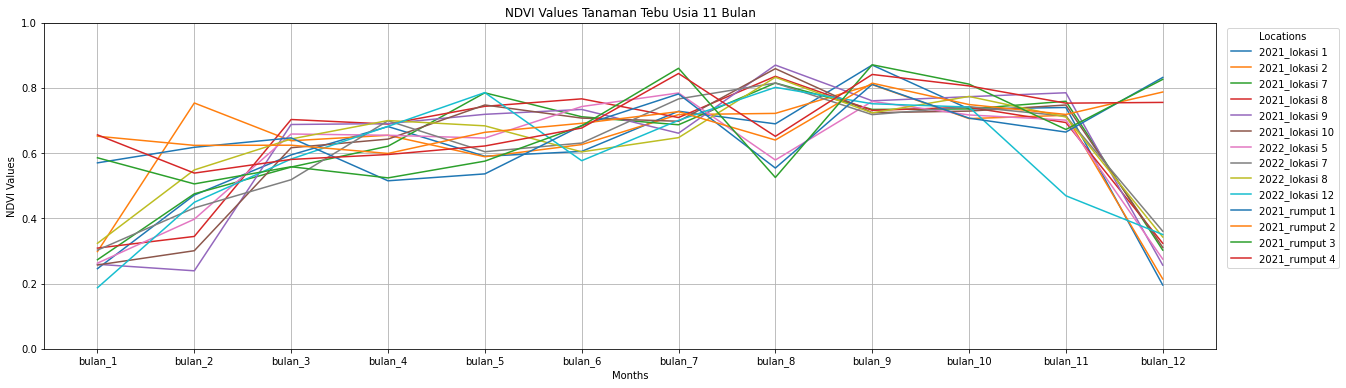

In [9]:
import matplotlib.pyplot as plt

months = ['bulan_1', 'bulan_2', 'bulan_3', 'bulan_4', 'bulan_5', 'bulan_6', 'bulan_7', 
          'bulan_8', 'bulan_9','bulan_10','bulan_11','bulan_12']

def plot_ndvi(data, title):
    plt.figure(figsize=(21, 6))
    for location in data['lokasi'].unique():
        subset = data[data['lokasi'] == location]
        plt.plot(months, subset[months].mean(), label=location)
    plt.title(title)
    plt.xlabel('Months')
    plt.ylabel('NDVI Values')
    plt.ylim(0, 1)
    plt.legend(title='Locations', bbox_to_anchor=(1.005, 1), loc='upper left')
    plt.grid(True)
    plt.show()

data_u10 = data[data['usia'] == 10]
data_u11 = data[data['usia'] == 11]
#data_2021_2022 = data[data['tahun_tanam'].isin([2021, 2022])]

#plot_ndvi(data_2021, 'NDVI Values Tanaman Tebu Usia 10 Bulan')
plot_ndvi(data_u11, 'NDVI Values Tanaman Tebu Usia 11 Bulan')
#plot_ndvi(data_2021_2022, 'NDVI Values from Month 1 to Month 9 for All Locations (2021 and 2022)')

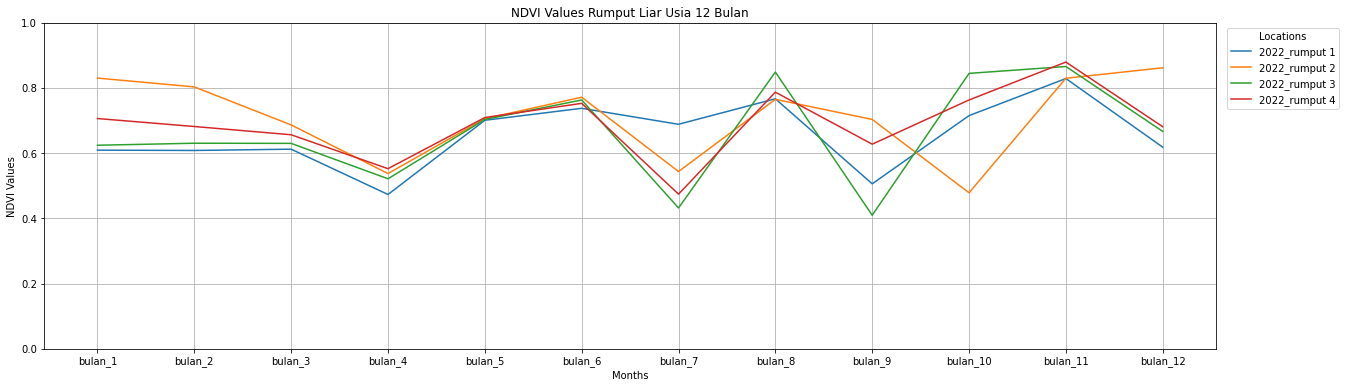

Polynomial Equation:
           10            9            8          7         6         5
4.687e-06 x  - 0.000308 x + 0.008788 x - 0.1428 x + 1.455 x - 9.662 x
       4         3         2
 + 42 x - 116.9 x + 197.2 x - 179.1 x + 65.94


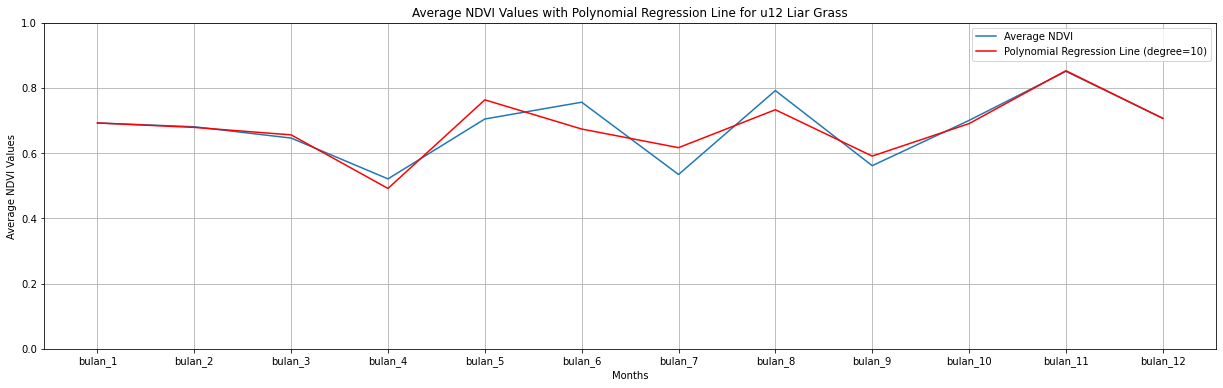

Mean Absolute Error (MAE): 0.03037978349902788
Root Mean Squared Error (RMSE): 0.04315915406658569


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

months = ['bulan_1', 'bulan_2', 'bulan_3', 'bulan_4', 'bulan_5', 'bulan_6', 'bulan_7', 
          'bulan_8', 'bulan_9', 'bulan_10', 'bulan_11', 'bulan_12', 'bulan_13', 'bulan_14']


months = ['bulan_1', 'bulan_2', 'bulan_3', 'bulan_4', 'bulan_5', 'bulan_6', 'bulan_7', 
          'bulan_8', 'bulan_9', 'bulan_10', 'bulan_11', 'bulan_12']

def plot_ndvi(data, title):
    plt.figure(figsize=(21, 6))
    for location in data['lokasi'].unique():
        subset = data[data['lokasi'] == location]
        plt.plot(months, subset[months].mean(), label=location)
    plt.title(title)
    plt.xlabel('Months')
    plt.ylabel('NDVI Values')
    plt.ylim(0, 1)
    plt.legend(title='Locations', bbox_to_anchor=(1.005, 1), loc='upper left')
    plt.grid(True)
    plt.show()

def plot_average_ndvi_with_polynomial_regression(data, degree):
    plt.figure(figsize=(21, 6))
    mean_ndvi = data[months].mean()
    #print(mean_ndvi)
    
    X = np.arange(1, len(months) + 1)  # Months as integer values
    y = mean_ndvi.values
    
    coefficients = np.polyfit(X, y, degree)
    polynomial_eqn = np.poly1d(coefficients)
    
    x_values = np.arange(1, 13, 1)
    
    y_values = polynomial_eqn(x_values)
    
    print("Polynomial Equation:")
    print(polynomial_eqn)
    
    nilai_x4 = polynomial_eqn(4)
    #print("Value of the polynomial at x = 4:", nilai_x4)
    
    plt.plot(X, y, label='Average NDVI')
    #plt.plot(x_values, y_values, label=f'Polynomial Regression Line (degree={degree})')
    plt.plot(x_values, y_values, color='red', linestyle='-', label=f'Polynomial Regression Line (degree={degree})')
    
    plt.title('Average NDVI Values with Polynomial Regression Line for u12 Liar Grass')
    plt.xlabel('Months')
    plt.ylabel('Average NDVI Values')
    plt.xticks(ticks=X, labels=months)
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.show()

    mae = mean_absolute_error(y, polynomial_eqn(X))
    rmse = np.sqrt(mean_squared_error(y, polynomial_eqn(X)))
    
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")

data_u10 = data[data['usia'] == 10]
data_u11 = data[data['usia'] == 11]
data_u11 = data[data['label'] == 'rumput_u12']

plot_ndvi(data_u11, 'NDVI Values Rumput Liar Usia 12 Bulan')
plot_average_ndvi_with_polynomial_regression(data_u11, degree=10)

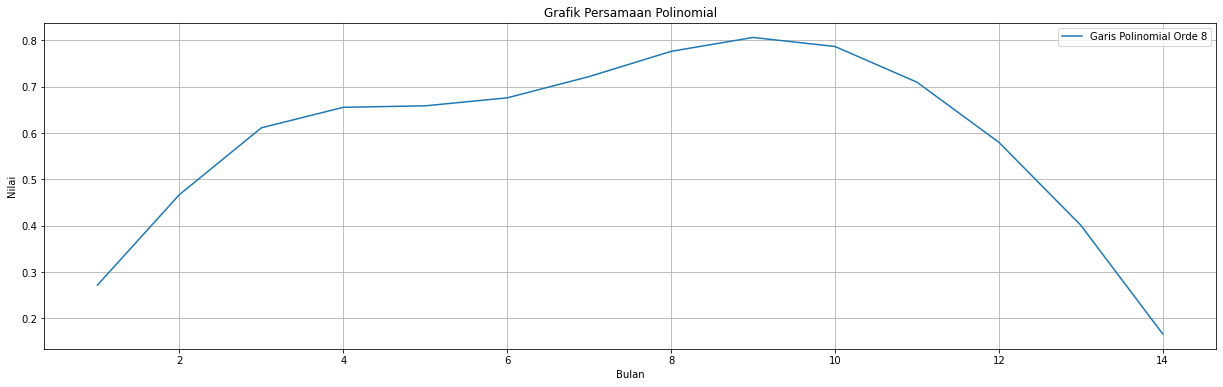

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Membuat array dari 1 hingga 15 untuk sumbu x
x_values = np.arange(1, 15,1)

# Menghitung nilai y (nilai garis) menggunakan persamaan polinomial yang baru untuk setiap titik x
y_values = (1.903e-07 * x_values**8 - 1.343e-05 * x_values**7 + 0.0003925 * x_values**6 -
            0.006104 * x_values**5 + 0.05388 * x_values**4 - 0.2662 * x_values**3 +
            0.6683 * x_values**2 - 0.5883 * x_values + 0.4098)

# Membuat plot garis
plt.figure(figsize=(21, 6))
plt.plot(x_values, y_values, label='Garis Polinomial Orde 8')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Grafik Persamaan Polinomial')
plt.legend()
plt.grid(True)
plt.show()

In [49]:
# Membuat array dari 1 hingga 15 untuk sumbu x
x_values = 5

# Menghitung nilai y (nilai garis) menggunakan persamaan polinomial untuk setiap titik x
y_values = 5.61e-05 * x_values**5 - 0.002297 * x_values**4 + 0.03401 * x_values**3 - 0.2307 * x_values**2 + 0.7469 * x_values - 0.2993

y_values

0.6586374999999999

# Cross-Correlation Similarity

## Sinyal acuan

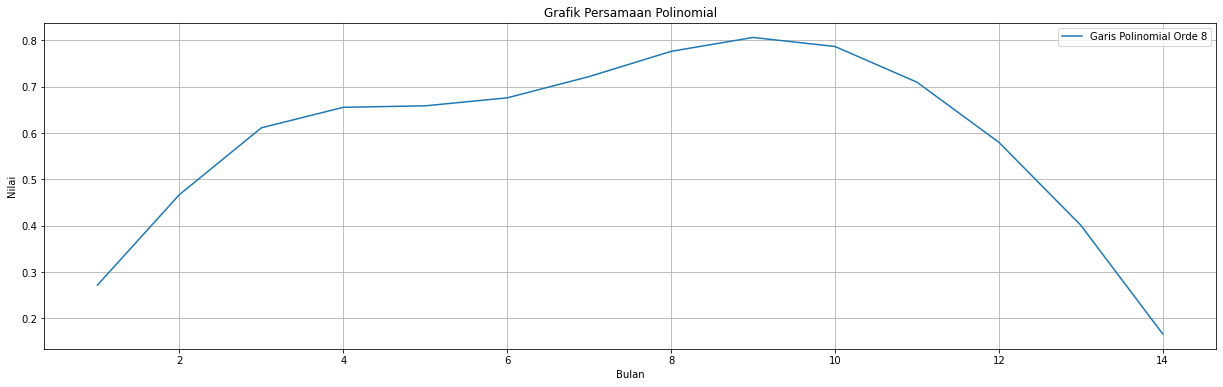

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.arange(1, 15,1)

# persamaan polinomial untuk setiap titik x. Pola NDVI citra tanaman tebu
y_values = (1.903e-07 * x_values**8 - 1.343e-05 * x_values**7 + 0.0003925 * x_values**6 -
            0.006104 * x_values**5 + 0.05388 * x_values**4 - 0.2662 * x_values**3 +
            0.6683 * x_values**2 - 0.5883 * x_values + 0.4098)

plt.figure(figsize=(21, 6))
plt.plot(x_values, y_values, label='Garis Polinomial Orde 8')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Grafik Persamaan Polinomial')
plt.legend()
plt.grid(True)
plt.show()

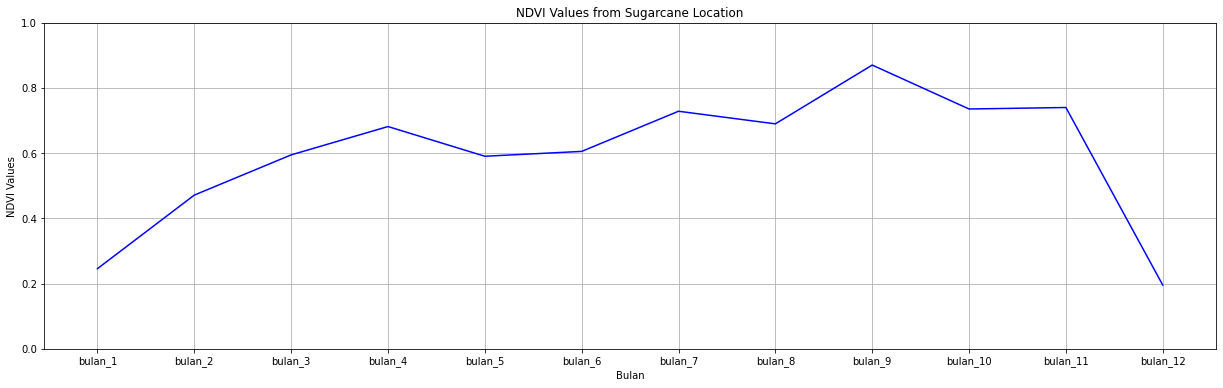

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'Hasil Pengolahan\initial_mei_2024\NDVI total - sortir.csv'
data = pd.read_csv(file_path, sep=';')

months = ['bulan_1', 'bulan_2', 'bulan_3', 'bulan_4', 'bulan_5', 'bulan_6', 'bulan_7', 
          'bulan_8', 'bulan_9','bulan_10','bulan_11','bulan_12']

second_row = data.iloc[1]
second_row_values = second_row[months].values.astype(float)

plt.figure(figsize=(21, 6))
plt.plot(months, second_row_values, color='b')
plt.title('NDVI Values from Sugarcane Location')
plt.xlabel('Bulan')
plt.ylabel('NDVI Values')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

[0.27175526 0.46700168 0.61121765 0.65549838 0.65872969 0.67594644
 0.72184364 0.77628084 0.80629384 0.7868     0.70985702 0.58000731
 0.4009134  0.16616264]


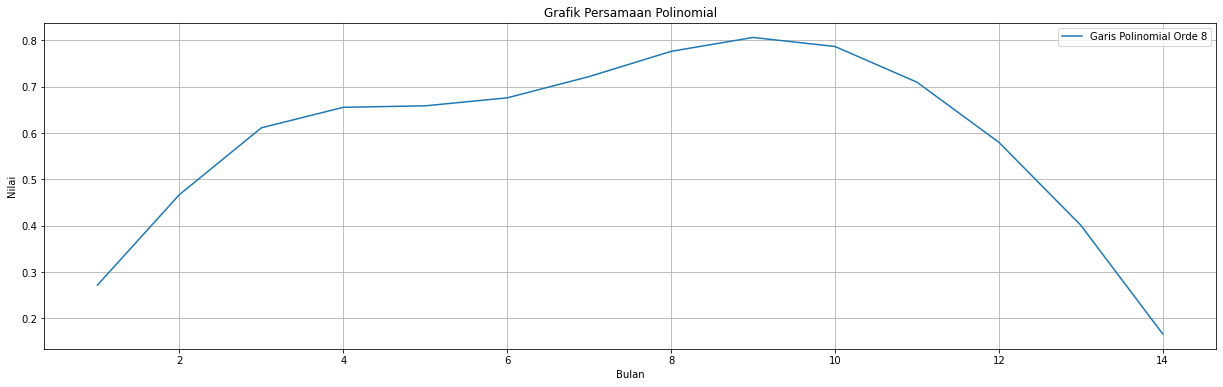

[0.30904759 0.34480161 0.70328375 0.68936025 0.7437111  0.76665301
 0.70931084 0.83571193 0.73144396 0.74081139 0.69399404 0.32374035]


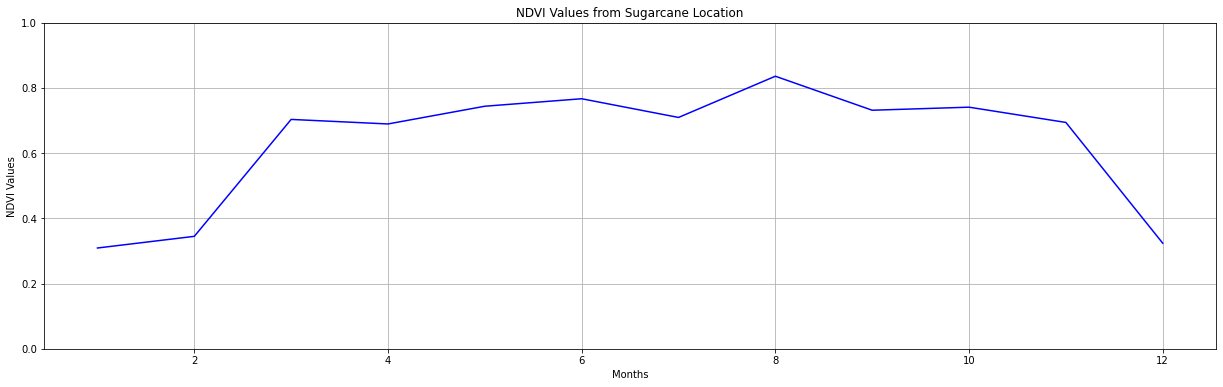

Cross-Correlation maximum at lag: 1


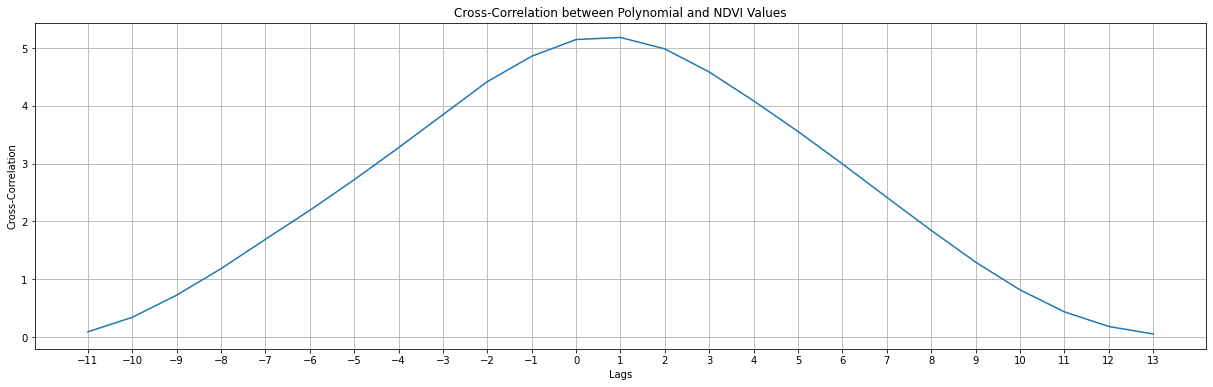

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Create array from 1 to 14 for x-axis
x_values = np.arange(1, 15, 1)

# Calculate y values using a polynomial equation for each x
y_values = (1.903e-07 * x_values**8 - 1.343e-05 * x_values**7 + 0.0003925 * x_values**6 -
            0.006104 * x_values**5 + 0.05388 * x_values**4 - 0.2662 * x_values**3 +
            0.6683 * x_values**2 - 0.5883 * x_values + 0.4098)

print(y_values)

# Plot the polynomial line
plt.figure(figsize=(21, 6))
plt.plot(x_values, y_values, label='Garis Polinomial Orde 8')
plt.xlabel('Bulan')
plt.ylabel('Nilai')
plt.title('Grafik Persamaan Polinomial')
plt.legend()
plt.grid(True)
plt.show()

# Load the dataset
file_path = r'Hasil Pengolahan/initial_mei_2024/NDVI total - sortir.csv'
data = pd.read_csv(file_path, sep=';')  # Using ';' as the delimiter

months = ['bulan_1', 'bulan_2', 'bulan_3', 'bulan_4', 'bulan_5', 'bulan_6', 'bulan_7', 
          'bulan_8', 'bulan_9','bulan_10','bulan_11','bulan_12']

# Extract and plot the NDVI values for the specified row
second_row = data.iloc[4]
second_row_values = second_row[months].values.astype(float)
print(second_row_values)

# Update x_values to match the length of second_row_values
x_values_updated = x_values[:len(second_row_values)]

plt.figure(figsize=(21, 6))
plt.plot(x_values_updated, second_row_values, color='b')
plt.title('NDVI Values from Sugarcane Location')
plt.xlabel('Months')
plt.ylabel('NDVI Values')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

# Compute cross-correlation
cross_corr = correlate(y_values, second_row_values, mode='full')

# Determine lag where cross-correlation is maximum
lags = np.arange(-len(second_row_values) + 1, len(y_values))
lag_at_max_corr = lags[np.argmax(cross_corr)]

print(f'Cross-Correlation maximum at lag: {lag_at_max_corr}')

# Plot cross-correlation with lag labels 1, 2, 3, ...
plt.figure(figsize=(21, 6))
plt.plot(lags, cross_corr)
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Polynomial and NDVI Values')
plt.xticks(np.arange(-len(second_row_values) + 1, len(y_values), 1))
plt.grid(True)
plt.show()


Cross-Correlation maximum at lag: 3


C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:25: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
C:\Users\mmasa\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:28: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


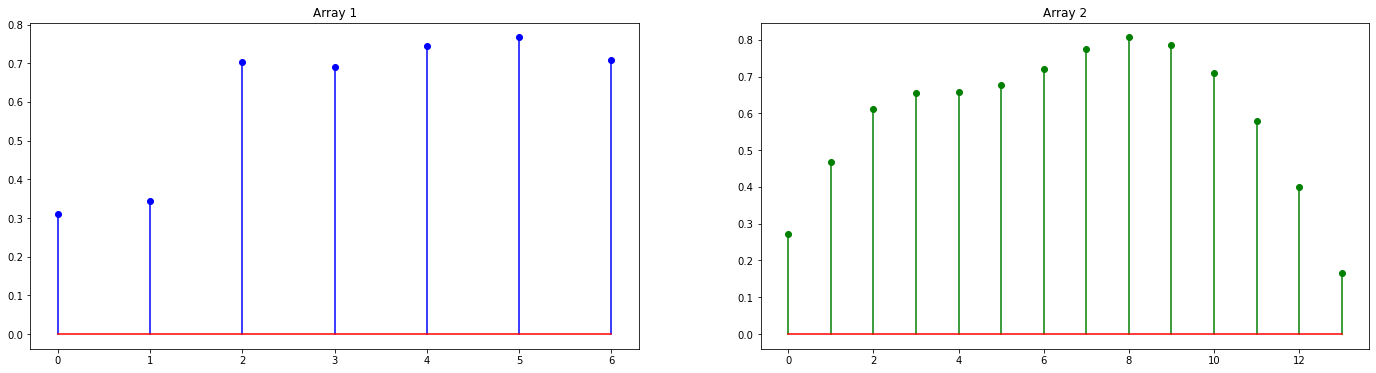

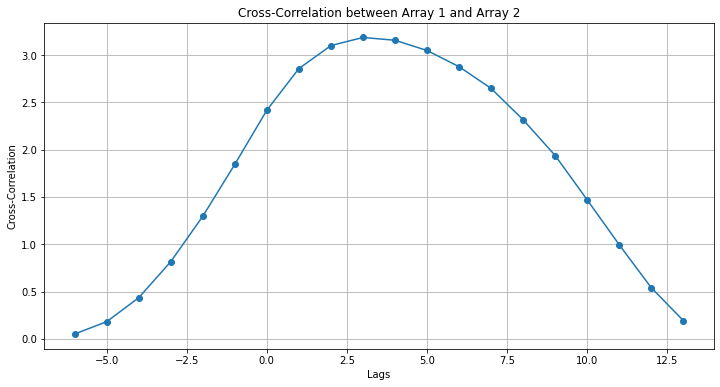

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Create two simple arrays
#array2 = np.array([0.30904759, 0.34480161, 0.70328375, 0.68936025, 0.7437111,  0.76665301, 0.70931084, 0.83571193, 0.73144396, 0.74081139, 0.69399404, 0.32374035])

array1 = np.array([0.30904759, 0.34480161, 0.70328375, 0.68936025, 0.7437111,  0.76665301, 0.70931084])
array2 = np.array([0.27175526, 0.46700168, 0.61121765, 0.65549838, 0.65872969, 0.67594644, 0.72184364, 0.77628084, 0.80629384, 0.7868, 0.70985702, 0.58000731, 0.4009134, 0.16616264])

# Calculate cross-correlation
cross_corr = correlate(array1, array2, mode='full')

# Calculate lags
lags = np.arange(-len(array1) + 1, len(array2))

# Find the lag with maximum cross-correlation
lag_at_max_corr = lags[np.argmax(cross_corr)]

print(f'Cross-Correlation maximum at lag: {lag_at_max_corr}')

# Plot the original arrays
plt.figure(figsize=(24, 6))
plt.subplot(1, 2, 1)
plt.stem(array1, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.title('Array 1')
plt.subplot(1, 2, 2)
plt.stem(array2, linefmt='g-', markerfmt='go', basefmt='r-')
plt.title('Array 2')
plt.show()

# Plot cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(lags, cross_corr, marker='o')
plt.xlabel('Lags')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Array 1 and Array 2')
plt.grid(True)
plt.show()